In [1]:
%matplotlib widget
# %matplotlib inline

import numpy as np
import cmath
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import kvn
import pylib.qucf_read as qucf_r
import pylib.measurement as mse
import LCHS

2366
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# ---------------------------------------------------------------------------------------------------
# --- Some global parameters ---
# ---------------------------------------------------------------------------------------------------
colors_ = ["b", "r", "g", "magenta", "black"]
path_save_ = "./jupyter-notebooks/NL/results/"
for _ in range(30):
    plt.close()

In [3]:
# ---------------------------------------------------------------------------------------------------
# --- Prepare intial parameters ---
# CL   - classical (simulations)
# QuCF - framework used for quantum computations
# LCHS - Linear Combination of Hamiltonian Simulations
# ---------------------------------------------------------------------------------------------------
mix.reload_module(kvn)

# --- two attractors ---
F_ = lambda x:  - np.sin(x) * (np.sin(x)**2 - 0.25) 
t_max, x_max = 4.0, 1
# ----------------------------------------

nx_ = 7
Nx_ = 1 << nx_
x_ = np.linspace(-x_max, x_max, Nx_)  

# --- Hermitian and anti-Hermitian parts of i*H ---
print("\n--- UPWINDING DIFFERENCE SCHEME ---")
H_UW_, Aa_, Ah_, _, _ = kvn.construct_UW_matrix_1D(x_, F_, flag_asin = False)
print()
print("Aa.Ah - Ah.Aa: {:20.3e}".format(np.max(Ah_.dot(Aa_) - Aa_.dot(Ah_))))

_, norm_Ah_, _ = mix.compute_normalized_matrix(Ah_, "Ah", True)
_, norm_Aa_, _ = mix.compute_normalized_matrix(Aa_, "Aa", True)

psi_init_ = np.ones(Nx_) * 2**(-nx_/2.)


--- UPWINDING DIFFERENCE SCHEME ---

Aa.Ah - Ah.Aa: 0.000e+00+2.377e+01j
Matrix Ah:	 nonsparsity, coefnorm: 3, 8.622e+01
Matrix Aa:	 nonsparsity, coefnorm: 2, 3.319e+01


In [8]:
# -----------------------------------------------
# --- LCHS parameters ----
# -----------------------------------------------
def find_norm_time_intervals():
    norm_qsvt_a = 0.35
    norm_qsvt_k = 0.90

    _, _, _ = kvn.compute_norm_matrices_LCHS(
        Aa_, Ah_, k_max_, dk_, 
        t_step = tau_,
        factor_global_a    = 1. / norm_qsvt_a,
        factor_global_kmax = 1. / norm_qsvt_k,
        factor_global_k    = 1. / norm_qsvt_k,
    )
    return 
# --------------------------------------------------

nk_init_, n_dk_ = 7, 0 

# t_LCHS_, Nt_ = 0.03, 3 
# t_LCHS_, Nt_ = 0.03, 1
t_LCHS_, Nt_ = 0.10, 1

flag_AA_ = True

# --- Time grid ---
tau_ = t_LCHS_ / Nt_
print("t, tau, N_steps: {:0.3e}, {:0.3e}, {:d}".format(t_LCHS_, tau_, Nt_))

# --- Fourier k-grid ---
nk_ = nk_init_ + n_dk_
Nk_ = 1 << nk_
dk_ = LCHS.get_dk(None, None, None, n_dk=n_dk_)
dk_comp = LCHS.get_dk(norm_Ah_, norm_Aa_, t_LCHS_, n_dk_)
k_max_ = 0.5 * dk_ * (Nk_ - 1)
k_grid_ = np.linspace(-k_max_, k_max_, Nk_)

# --- Print parameters ---
print("kmax, nk:\t {:0.12f}, {:d}".format(k_max_, nk_))
print("dk:\t\t {:0.3e}".format(dk_))
print("dk_comp:\t {:0.3e}\n".format(dk_comp))

# --- Parameters for the BE of the weights ---
print("//--- Angles for the weight-oracle ---")
alpha_k0 = - 1.0
alpha_k1 = np.abs(alpha_k0) * Nk_/(Nk_ - 1)
print("nk \t{:d}".format(nk_))
print("alpha_k0 \t{:0.12e}".format(alpha_k0))
print("alpha_k1 \t{:0.12e}".format(alpha_k1))

print("\n--- Matrix norms ---")
find_norm_time_intervals()

del dk_comp

t, tau, N_steps: 1.000e-01, 1.000e-01, 1
kmax, nk:	 40.967741935484, 7
dk:		 6.452e-01
dk_comp:	 6.452e-01

//--- Angles for the weight-oracle ---
nk 	7
alpha_k0 	-1.000000000000e+00
alpha_k1 	1.007874015748e+00

--- Matrix norms ---
Matrix Ba:	 nonsparsity, coefnorm: 2, 3.319e+01
Matrix B_kmax:	 nonsparsity, coefnorm: 3, 3.532e+03
Matrix Bk:	 nonsparsity, coefnorm: 3, 5.562e+01

norm of Ba_norm_:     0.500
norm of B_kmax_norm_: 0.333
norm of Bk_norm_:     0.333

--- Time steps ---
dt_a, dt_kmax, dt_k: 4.741402097111e+00, 3.924537573137e+02, 6.180374130925e+00


In [6]:
# --------------------------------------------------------
# --- LCHS python simulation ---
# --------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(kvn)
mix.reload_module(LCHS)

sel_test = 6

if sel_test == 8:
    # psi_ref_ = kvn.LCHS_computation_DEBUG_2(
    #     k_grid_, tau_,
    #     1j * H_UW_, 
    #     psi_init_, 
    #     Nt_steps = 1
    # )

    psi_ref_ = kvn.LCHS_computation_DEBUG(
        k_grid_, tau_,
        1j * H_UW_, 
        psi_init_, Nt_, 
        sel_test = 12,
        flag_trotterization = True
    )
else:
    psi_ref_ = kvn.LCHS_computation_DEBUG(
        k_grid_, tau_,
        1j * H_UW_, 
        psi_init_, Nt_, 
        sel_test = sel_test,
        flag_trotterization = True
    )
print("test {:d}: Done.".format(sel_test))

test 6: Done.



Reading the file ../QuCF/simulations/LCHS/KvN/test-6-complete//kvn_OUTPUT.hdf5...
Name of the simulation is kvn
Simulation has been performed  07-11-2024 14:16:45
A-max: 8.676347169081e-02
success prob: 9.127760642162e-01
N-gates: 12651105
max-err: 7.447e-05


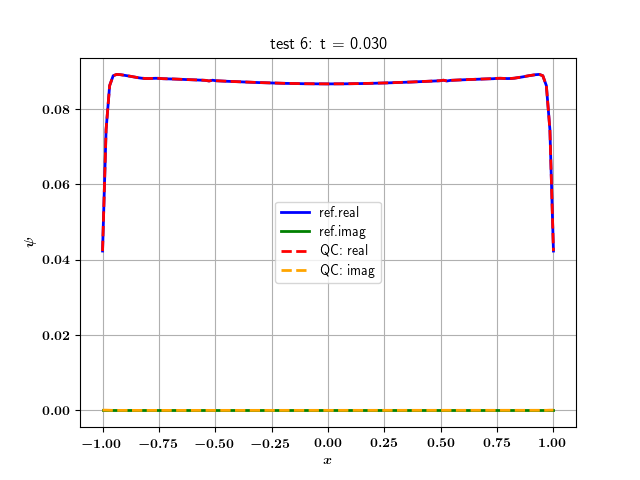

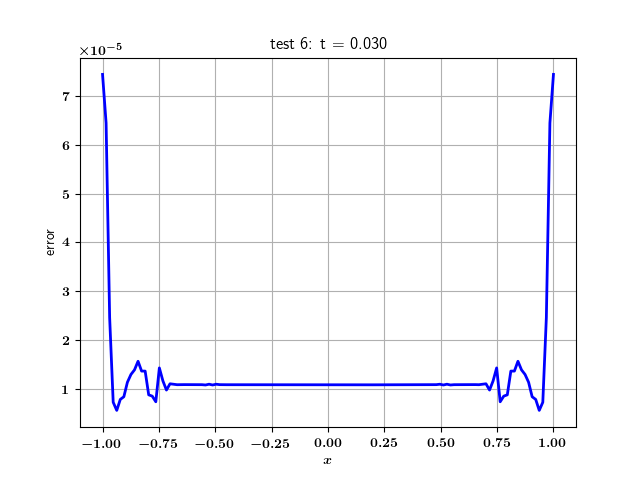

In [7]:
# --------------------------------------------------------
# --- Read results from quantum simulations ---
# --------------------------------------------------------
def read_qc_data(path_qc, name_qc = "kvn"):
    print()  

    # --- Read the _OUTPUT.hdf5 file ---
    om = mse.MeasOracle__()
    om.path_  = path_qc
    om.pname_ = name_qc
    om.open()
    
    # --- get the result ---
    Ngates = om.dd_["N-gates"]
    om.set_zero_ancillae_work_states(0)
    qc_state = om.get_var_x({}, "rx")
    
    print("A-max: {:0.12e}".format(np.max(np.abs(qc_state))))
    print("success prob: {:0.12e}".format(  np.sum(np.abs(qc_state)**2)  ))
    print("N-gates: {:d}".format(Ngates))

    # renormalization due to the influenc of the weights:
    
    Hadamart_norm_factor = 2**(nk_) 
    if sel_test > 5 and sel_test < 8:

        if sel_test == 6:
            qc_state *= Hadamart_norm_factor * (dk_ / np.pi)
            if flag_AA_: 
                rr_w = None # these coefficients are computed in calc-weights.ipynb
                if int(k_max_) == 40 and nk_ == 7: 
                    rr_w = 5.056431725491e+00
                qc_state /= rr_w**2
        else:
            om.read_qsvt()
            coef_norm = Hadamart_norm_factor / om.dd_["weights"]["rescaling_factor"]
            qc_state *= coef_norm * (dk_ / np.pi)
            if flag_AA_:
                rr_w = None # these coefficients are computed in calc-weights.ipynb
                if int(k_max_) == 10 and nk_ == 5:
                    rr_w = 2.470306404836081
                if int(k_max_) == 10 and nk_ == 7: 
                    rr_w = 2.420481578341e+00
                if int(k_max_) == 20 and nk_ == 8: 
                    rr_w = 3.603260855413e+00
                if int(k_max_) == 40 and nk_ == 7: 
                    rr_w = 5.092072717098e+00

                qc_state /= rr_w**2
        
    elif sel_test == 8:
        qc_state *= dk_ / np.pi * Hadamart_norm_factor
    else:
        qc_state *= Hadamart_norm_factor
    return qc_state
# ------------------------------------------------------------------------------
def compare_ref_qu():
    y_ref_ch = np.array(psi_ref_)

    if sel_test == 1:
        psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-1-selector/", 
            "kvn"
        )

    if sel_test == 2:
        psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-2-wo-selector/", 
            "kvn"
        )

    if sel_test == 3:
        psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-3-max/", 
            "kvn"
        )

    if sel_test == 4:
        psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-4-a/", 
            "kvn"
        )

    if sel_test == 5:
        psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-5-full/", 
            "kvn"
        )

    if sel_test == 6:
        psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-6-complete/", 
            "kvn"
            # "kvn_repeat"
        )

    if sel_test == 7:
        psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-7-a/", 
            "kvn"
        )

    if sel_test == 8:
        psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-8-dir/", 
            "kvn"
        )


    # # --- renorm ---
    # psi_qc.real *= np.max(np.abs(y_ref_ch.real)) / np.max(np.abs(psi_qc.real))

    # --- Compute the absolute error ---
    err_res = np.abs(y_ref_ch - psi_qc)
    max_abs_err = np.max(np.abs(err_res))
    print("max-err: {:0.3e}".format(max_abs_err))

    # --- Compare the quantum state and the reference simulation ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    # ax.plot(x_, psi_init_.real, "-", color = "blue",   linewidth = 2, label = "ref.real")

    ax.plot(x_, y_ref_ch.real, "-", color = "blue",   linewidth = 2, label = "ref.real")
    ax.plot(x_, y_ref_ch.imag, "-", color = "green",  linewidth = 2, label = "ref.imag")
    ax.plot(x_, psi_qc.real,  "--", color = "red",    linewidth = 2, label = "QC: real")
    ax.plot(x_, psi_qc.imag,  "--", color = "orange", linewidth = 2, label = "QC: imag")

    # ax.plot(x_, psi_qc_2.real,  ":", color = "black",   linewidth = 2, label = "QC2: real")
    # ax.plot(x_, psi_qc_2.imag,  ":", color = "gray",    linewidth = 2, label = "QC2: imag")

    plt.xlabel('$x$')
    plt.ylabel("$\psi$")
    ax.legend()
    plt.title("test {:d}: t = {:0.3f}".format(sel_test, t_LCHS_))
    plt.grid(True)
    plt.show()

    # --- Absolute error ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x_, err_res, "-b", linewidth = 2)
    plt.xlabel('$x$')
    plt.ylabel("error")
    plt.title("test {:d}: t = {:0.3f}".format(sel_test, t_LCHS_))
    plt.grid(True)
    plt.show()
    return
# ------------------------------------------------------------------------------
compare_ref_qu()


Reading the file /media/work/docs/codes/QuCF/QuCF/simulations/LCHS/KvN/test-8-dir//kvn_OUTPUT.hdf5...
Name of the simulation is kvn
Simulation has been performed  07-10-2024 19:22:31
A-max: 9.517086177606e-01
success prob: 4.793832677666e+00
N-gates: 135


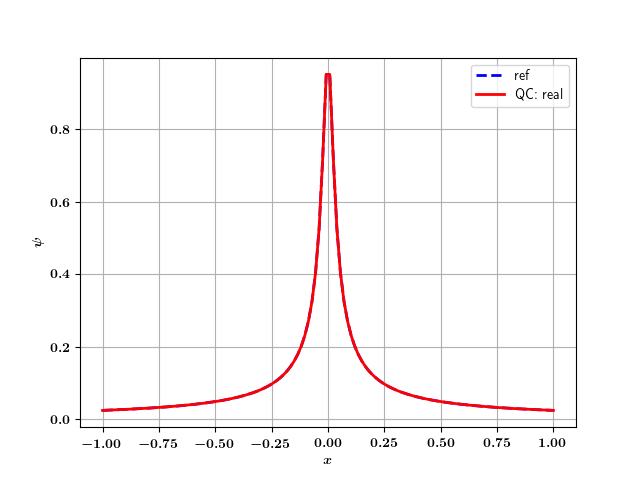

max. abs. error: 1.554e-15


In [20]:
# --------------------------------------------------------
# --- Read weights ---
# --------------------------------------------------------
def read_qc_data(path_qc, name_qc = "kvn", flag_qsvt = False):
    print()  

    # --- Read the _OUTPUT.hdf5 file ---
    om = mse.MeasOracle__()
    om.path_  = path_qc
    om.pname_ = name_qc
    om.open()
    
    # --- get the result ---
    Hadamart_norm_factor = 2**(nk_/2)
    if not flag_qsvt:
        Ngates = om.dd_["N-gates"]
        om.set_zero_ancillae_work_states(0)
        qc_state = om.get_var_x({}, "rk")
        coef_norm = Hadamart_norm_factor
    else:
        Ngates = om.dd_["N-gates"]
        om.set_work_states(0)
        qc_state = om.get_var_x({"a_qsvt_w":0, "a_sin_k":0}, "rk")
        om.read_qsvt()
        coef_norm = Hadamart_norm_factor / om.dd_["weights"]["rescaling_factor"]
        qc_state *= -1

    

    print("A-max: {:0.12e}".format(np.max(np.abs(qc_state))))
    print("success prob: {:0.12e}".format(  np.sum(np.abs(qc_state)**2)  ))
    print("N-gates: {:d}".format(Ngates))

    qc_state *= coef_norm

    # if sel_test > 5:
    #     # coef_norm = Hadamart_norm_factor / om.dd_["weights"]["rescaling_factor"]
    #     # qc_state *= coef_norm * (dk_ / np.pi)
    #     dump = 0
    # else:
    #     qc_state *= Hadamart_norm_factor

    # if flag_AA_:
    #     rr_w = None # these coefficients are computed in calc-weights.ipynb
    #     if int(k_max_) == 10 and nk_ == 5:
    #         rr_w = 2.470306404836081
    #     if int(k_max_) == 10 and nk_ == 7: 
    #         rr_w = 2.420481578341e+00
    #     if int(k_max_) == 20 and nk_ == 8: 
    #         rr_w = 3.603260855413e+00
    #     if int(k_max_) == 40 and nk_ == 7: 
    #         rr_w = 5.092072717098e+00

    #     qc_state /= rr_w**2

    return qc_state
# ------------------------------------------------------------------------------
def compare_ref_qu():
    psi_qc = read_qc_data(
            "../QuCF/simulations/LCHS/KvN/test-8-dir/", 
            "kvn", False
        )
    # psi_qc_2 = read_qc_data(
    #         "../QuCF/simulations/LCHS/KvN/test-weights/", 
    #         "kvn", True
    #     )

    y_ref = 1. / np.sqrt(1. + k_grid_*k_grid_)

    # --- Compare the quantum state and the reference simulation ---
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x_,  y_ref.real,  "--", color = "blue",    linewidth = 2, label = "ref")
    ax.plot(x_, psi_qc.real,   "-", color =  "red",    linewidth = 2, label = "QC: real")
    

    # ax.plot(x_, psi_qc.imag,  "--", color = "orange", linewidth = 2, label = "QC: imag")

    plt.xlabel('$x$')
    plt.ylabel("$\psi$")
    ax.legend()
    plt.grid(True)
    plt.show()


    print("max. abs. error: {:0.3e}".format(
        np.max(np.abs(psi_qc - y_ref))
    ))

    return
# ------------------------------------------------------------------------------
compare_ref_qu()